In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

data =pd.DataFrame(X,columns=iris.feature_names)
data["Species"] = y

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.shape

(150, 5)

In [4]:
data['Species'].unique()


array([0, 1, 2])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='Species', ylabel='count'>

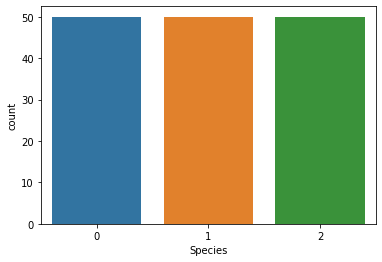

In [7]:
sns.countplot(data['Species'])

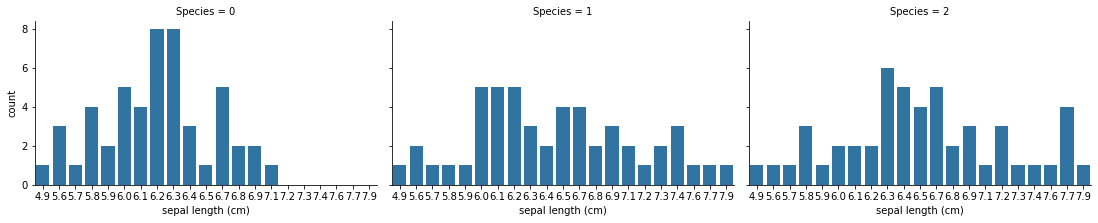

In [8]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot,'sepal length (cm)')

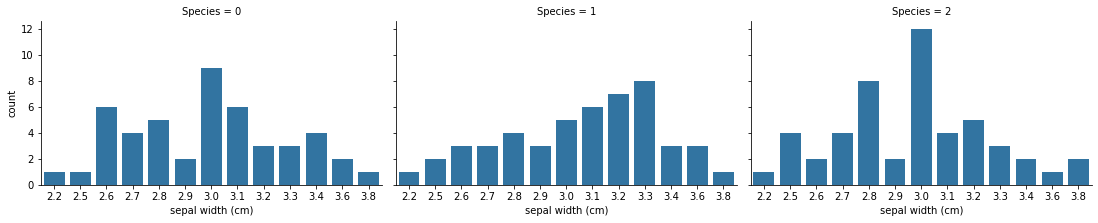

In [9]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot,'sepal width (cm)')

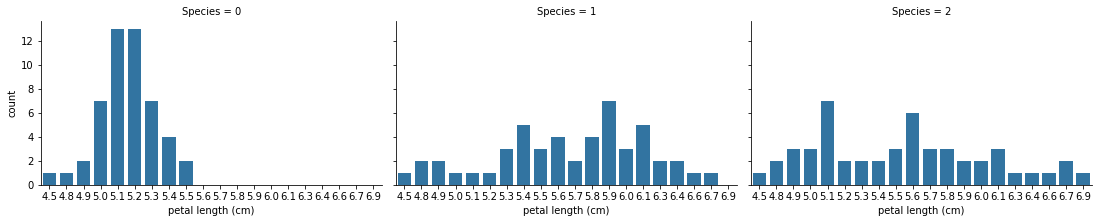

In [10]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot,'petal length (cm)')

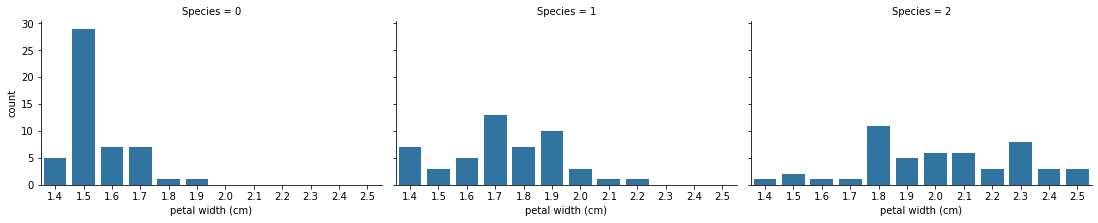

In [23]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot,'petal width (cm)')

In [12]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic_Regression': LogisticRegression(random_state=42),
    'svc' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1, random_state=42),
    'GradientBoostingClassifier' :  GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42),
    
}

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred, retur=False):
    pre = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
        
    if retur:
        return pre, rec, accuracy
    else:
        print(pre)
        print(rec)
        print(accuracy)

In [17]:
def train_and_eval(models, X,y,loss):
    for name, model in models.items():
        print(name ,':') 
        model.fit(X,y)
        loss(y, model.predict(X))                  
        print('*' * 30)

In [18]:
train_and_eval(models, X_train, y_train,loss)

Logistic_Regression :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************
svc :
0.9912280701754387
0.990990990990991
0.9904761904761905
******************************
DecisionTreeClassifier :
0.5
0.6666666666666666
0.6476190476190476
******************************
GradientBoostingClassifier :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************


In [19]:
gra = GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
gra.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=3,
                           random_state=42)

In [20]:
gra.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [22]:
import joblib

joblib.dump(gra, 'model.pkl')

grad = joblib.load('model.pkl')